# Stock Price Prediction with LSTM

1. [Preprocess Data](#Preprocess-Data)
2. [Stacked LSTM](#Stacked-LSTM)
3. [Encoder-Decoder LSTM](#Encoder-Decoder-LSTM)
4. [Encoder-Decoder LSTM with Attention](#Encoder-Decoder-LSTM-with-Attention)

# Preprocess Data

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Dropout, LSTM, RepeatVector, TimeDistributed, Input, \
    multiply, concatenate, Activation, dot
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from util import get_features_labels

In [2]:
plt.rcParams["figure.figsize"] = (16, 8)

In [3]:
INPUT_PATH = 'data/'
OUTPUT_PATH = 'output/'
TICKER = 'googl'
TRAIN_START = '20150101'
TEST_START = '20200101'
SEQ_LEN = 60
FORECAST_HORIZON = 1
N_HIDDEN = 50

In [4]:
# Load data
df = pd.read_csv(INPUT_PATH + TICKER + '.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True) # In case the data is not sorted
df.sort_index(ascending=True, axis=0, inplace=True)
df.tail()

,open,high,close,volume
date,,,,
2020-11-12,1742.00,1764.98,1742.82,1324363.0
2020-11-13,1748.00,1777.13,1772.26,1487877.0
2020-11-16,1764.14,1794.34,1774.03,1273393.0
2020-11-17,1767.86,1777.14,1761.66,1066034.0
2020-11-18,1756.64,1765.00,1740.64,991634.0


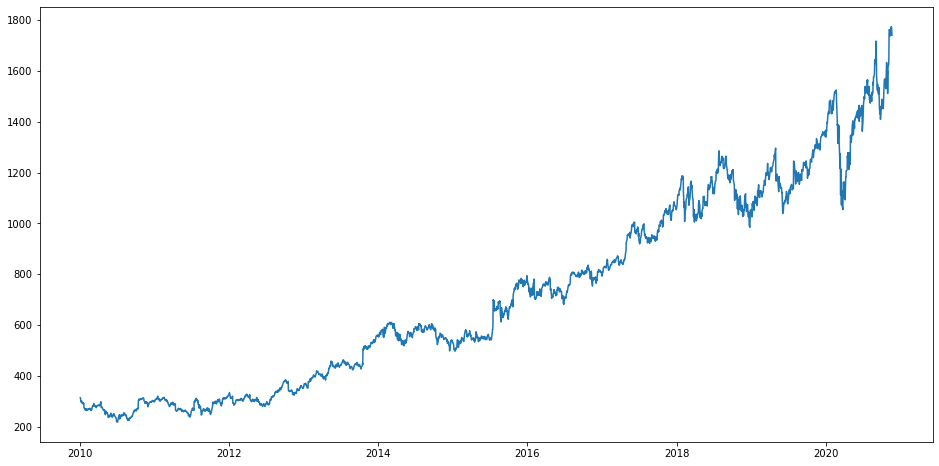

In [5]:
# Plot the data
plt.plot(df['close'])

In [6]:
# Get close price only starting from the TRAIN_START date
data = df.loc[df.index >= TRAIN_START, 'close'].to_frame()
# Split data into training and test sets
train = data.loc[data.index < TEST_START]
test = data.loc[data.index >= TEST_START]

In [7]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [8]:
# Get training data
X_train, y_train = get_features_labels(train_scaled, SEQ_LEN)
# Get test data
X_test, _ = get_features_labels(test_scaled, SEQ_LEN)

# Stacked LSTM

In [10]:
# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=N_HIDDEN, activation='elu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=N_HIDDEN, activation='elu'))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.3, verbose=2)
model.save('models/{}_stacked_lstm.h5'.format(TICKER))

Epoch 1/100
27/27 - 7s - loss: 0.0363 - mse: 0.0363 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 2/100
27/27 - 6s - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 3/100
27/27 - 6s - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 4/100
27/27 - 5s - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 5/100
27/27 - 6s - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 6/100
27/27 - 5s - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 7/100
27/27 - 5s - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 8/100
27/27 - 6s - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 9/100
27/27 - 5s - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 10/100
27/27 - 5s - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 11/100
27/27 - 6s - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 12/100
27/27 

Epoch 88/100
27/27 - 6s - loss: 8.1914e-04 - mse: 8.1914e-04 - val_loss: 8.0128e-04 - val_mse: 8.0128e-04
Epoch 89/100
27/27 - 5s - loss: 8.1280e-04 - mse: 8.1280e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 90/100
27/27 - 6s - loss: 8.6389e-04 - mse: 8.6389e-04 - val_loss: 6.6250e-04 - val_mse: 6.6250e-04
Epoch 91/100
27/27 - 6s - loss: 9.1750e-04 - mse: 9.1750e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 92/100
27/27 - 6s - loss: 9.6206e-04 - mse: 9.6206e-04 - val_loss: 6.5426e-04 - val_mse: 6.5426e-04
Epoch 93/100
27/27 - 6s - loss: 9.3045e-04 - mse: 9.3045e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 94/100
27/27 - 5s - loss: 7.9229e-04 - mse: 7.9229e-04 - val_loss: 8.5401e-04 - val_mse: 8.5401e-04
Epoch 95/100
27/27 - 6s - loss: 7.7096e-04 - mse: 7.7096e-04 - val_loss: 6.5646e-04 - val_mse: 6.5646e-04
Epoch 96/100
27/27 - 5s - loss: 7.8618e-04 - mse: 7.8618e-04 - val_loss: 7.7918e-04 - val_mse: 7.7918e-04
Epoch 97/100
27/27 - 5s - loss: 7.7467e-04 - mse: 7.7467e-04 - val_los

In [9]:
# Load the best saved model
model = load_model('models/{}_stacked_lstm.h5'.format(TICKER))

In [10]:
# Make predictions
preds = model.predict(X_test)
preds_unscaled = scaler.inverse_transform(preds)
preds_unscaled = pd.DataFrame(data=preds_unscaled, index=test.index[test.shape[0] - preds_unscaled.shape[0]:])

In [11]:
# Shift preds up by 1 so that it's convenient for backtesting
preds_shifted = preds_unscaled.shift(-1)
# Merge all into 1 dataframe and save results into a csv
res = df.merge(preds_shifted, how='right', left_index=True, right_index=True)
res.rename(columns={0: 'preds'}, inplace=True)
res.to_csv('{}{}_preds_stacked_lstm.csv'.format(OUTPUT_PATH, TICKER))
res.head()

,open,high,close,volume,preds
date,,,,,
2020-03-30,1132.64,1151.00,1146.31,2936827.0,1140.858521
2020-03-31,1148.73,1173.40,1161.95,3246344.0,1146.276245
2020-04-01,1124.00,1129.42,1102.10,2591230.0,1123.183105
2020-04-02,1100.00,1122.77,1117.03,2787484.0,1105.752808
2020-04-03,1114.71,1118.79,1092.70,2568694.0,1087.700317


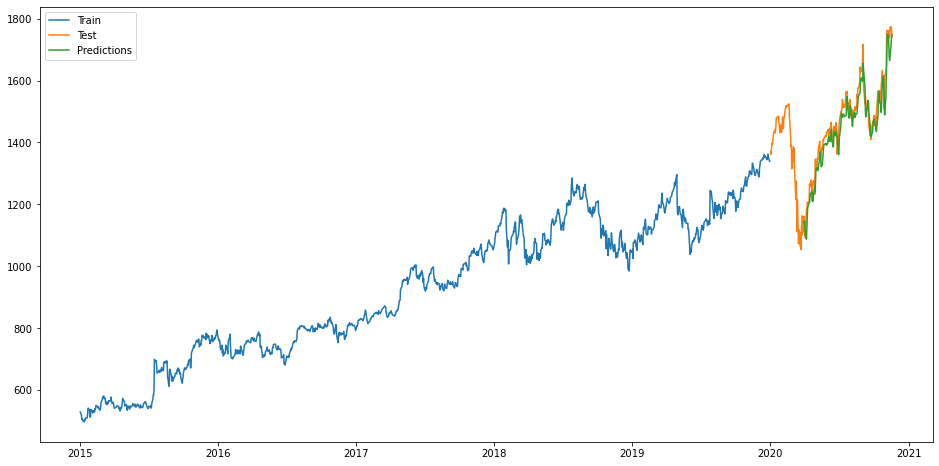

In [13]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(preds_unscaled, label='Predictions')
plt.legend()

In [14]:
# Get MSEs
train_mse = history.history['mse']
valid_mse = history.history['val_mse']
test_mse = mean_squared_error(test[test.shape[0] - preds_unscaled.shape[0]:], preds_unscaled)
test_mse

1863.2516529724094

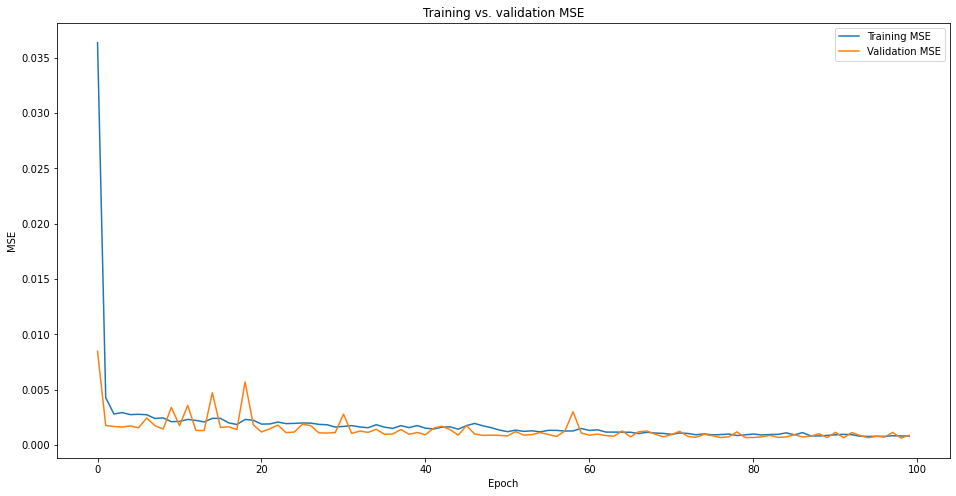

In [15]:
plt.plot(train_mse, label='Training MSE'), 
plt.plot(valid_mse, label='Validation MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.title('Training vs. validation MSE')
plt.legend()

# Encoder-Decoder LSTM

In [10]:
y_train = np.reshape(y_train, (y_train.shape[0], FORECAST_HORIZON, 1))

In [11]:
input_train = Input(shape=(X_train.shape[1], X_train.shape[2]))
output_train = Input(shape=(y_train.shape[1], y_train.shape[2]))
encoder_last_h1, encoder_last_h2, encoder_last_c = LSTM(
    units=N_HIDDEN, activation='elu',
    return_sequences=False, return_state=True)(input_train)

decoder = RepeatVector(output_train.shape.as_list()[1])(encoder_last_h1)
decoder = LSTM(units=N_HIDDEN, activation='elu',
               return_state=False, return_sequences=True)(
    decoder, initial_state=(encoder_last_h1, encoder_last_c))
decoder = Dropout(rate=0.2)(decoder)
out = TimeDistributed(Dense(1))(decoder)

model = Model(inputs=input_train, outputs=out)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.3, verbose=2)
model.save('models/{}_encoder_decoder_lstm.h5'.format(TICKER))

Epoch 1/100
27/27 - 4s - loss: 0.0644 - mse: 0.0644 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 2/100
27/27 - 3s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 3/100
27/27 - 3s - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4/100
27/27 - 3s - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 5/100
27/27 - 4s - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 6/100
27/27 - 3s - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 7/100
27/27 - 3s - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 8/100
27/27 - 3s - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 9/100
27/27 - 3s - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 10/100
27/27 - 3s - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 11/100
27/27 - 4s - loss: 0.0021 - mse: 0.0021 - val_loss: 9.7614e-04 - val_mse: 9.7614e-04
Epoch 12/10

27/27 - 9s - loss: 9.1672e-04 - mse: 9.1672e-04 - val_loss: 5.4974e-04 - val_mse: 5.4974e-04
Epoch 86/100
27/27 - 9s - loss: 8.7072e-04 - mse: 8.7072e-04 - val_loss: 5.7205e-04 - val_mse: 5.7205e-04
Epoch 87/100
27/27 - 9s - loss: 8.3559e-04 - mse: 8.3559e-04 - val_loss: 6.3373e-04 - val_mse: 6.3373e-04
Epoch 88/100
27/27 - 9s - loss: 7.7715e-04 - mse: 7.7715e-04 - val_loss: 5.8290e-04 - val_mse: 5.8290e-04
Epoch 89/100
27/27 - 9s - loss: 7.4410e-04 - mse: 7.4410e-04 - val_loss: 8.7097e-04 - val_mse: 8.7097e-04
Epoch 90/100
27/27 - 9s - loss: 7.8476e-04 - mse: 7.8476e-04 - val_loss: 5.6658e-04 - val_mse: 5.6658e-04
Epoch 91/100
27/27 - 9s - loss: 7.9124e-04 - mse: 7.9124e-04 - val_loss: 5.4705e-04 - val_mse: 5.4705e-04
Epoch 92/100
27/27 - 9s - loss: 7.4471e-04 - mse: 7.4471e-04 - val_loss: 9.6381e-04 - val_mse: 9.6381e-04
Epoch 93/100
27/27 - 9s - loss: 7.6419e-04 - mse: 7.6419e-04 - val_loss: 7.4683e-04 - val_mse: 7.4683e-04
Epoch 94/100
27/27 - 9s - loss: 8.8894e-04 - mse: 8.8894e-0

In [12]:
# Load the best saved model
model = load_model('models/{}_encoder_decoder_lstm.h5'.format(TICKER))

In [13]:
# Make predictions
preds = model.predict(X_test)
preds_unscaled = scaler.inverse_transform(np.reshape(preds, (preds.shape[0], 1)))
preds_unscaled = pd.DataFrame(data=preds_unscaled, index=test.index[test.shape[0] - preds_unscaled.shape[0]:])

In [14]:
# Shift preds up by 1 so that it's convenient for backtesting
preds_shifted = preds_unscaled.shift(-1)
# Merge all into 1 dataframe and save results into a csv
res = df.merge(preds_shifted, how='right', left_index=True, right_index=True)
res.rename(columns={0: 'preds'}, inplace=True)
res.to_csv('{}{}_preds_encoder_decoder_lstm.csv'.format(OUTPUT_PATH, TICKER))
res.head()

,open,high,close,volume,preds
date,,,,,
2020-03-30,1132.64,1151.00,1146.31,2936827.0,1152.003052
2020-03-31,1148.73,1173.40,1161.95,3246344.0,1164.715210
2020-04-01,1124.00,1129.42,1102.10,2591230.0,1133.086792
2020-04-02,1100.00,1122.77,1117.03,2787484.0,1122.385254
2020-04-03,1114.71,1118.79,1092.70,2568694.0,1103.386841


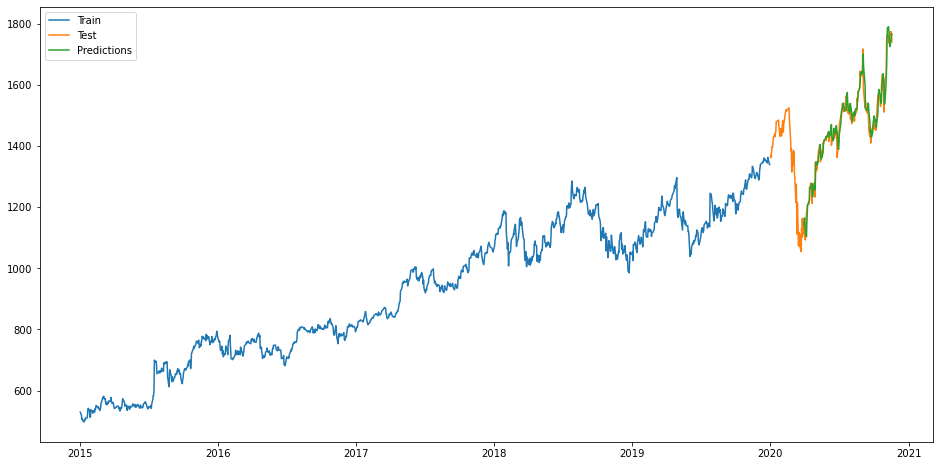

In [14]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(preds_unscaled, label='Predictions')
plt.legend()

In [15]:
# Get MSEs
train_mse = history.history['mse']
valid_mse = history.history['val_mse']
test_mse = mean_squared_error(test[test.shape[0] - preds_unscaled.shape[0]:], preds_unscaled)
test_mse

1001.6158436169328

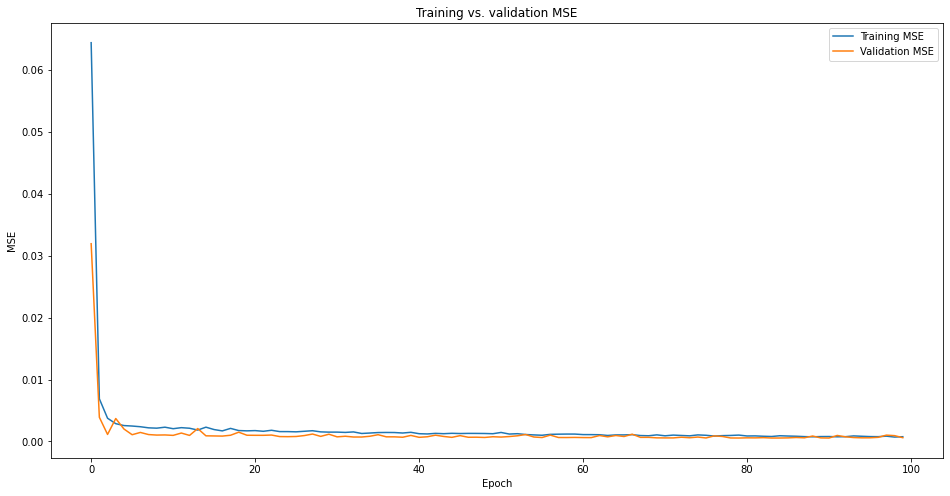

In [16]:
plt.plot(train_mse, label='Training MSE'), 
plt.plot(valid_mse, label='Validation MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.title('Training vs. validation MSE')
plt.legend()

# Encoder-Decoder LSTM with Attention

In [9]:
y_train = np.reshape(y_train, (y_train.shape[0], FORECAST_HORIZON, 1))

In [10]:
input_train = Input(shape=(X_train.shape[1], X_train.shape[2]))
output_train = Input(shape=(y_train.shape[1], y_train.shape[2]))
encoder_stack_h, encoder_last_h, encoder_last_c = LSTM(
    units=N_HIDDEN, activation='elu',
    return_state=True, return_sequences=True)(input_train)

decoder_input = RepeatVector(output_train.shape.as_list()[1])(encoder_last_h)
decoder_stack_h = LSTM(units=N_HIDDEN, activation='elu',
               return_state=False, return_sequences=True)(
    decoder_input, initial_state=[encoder_last_h, encoder_last_c])
attention = dot([decoder_stack_h, encoder_stack_h], axes=[2, 2])
attention = Activation('softmax')(attention)
context = dot([attention, encoder_stack_h], axes=[2,1])
decoder_combined_context = concatenate([context, decoder_stack_h])
decoder_combined_context = Dropout(rate=0.2)(decoder_combined_context)
out = TimeDistributed(Dense(1))(decoder_combined_context)

model = Model(inputs=input_train, outputs=out)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.3, verbose=2)
model.save('models/{}_encoder_decoder_lstm_attention.h5'.format(TICKER))

Epoch 1/100
27/27 - 4s - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 2/100
27/27 - 3s - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 3/100
27/27 - 3s - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 4/100
27/27 - 3s - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 5/100
27/27 - 3s - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 6/100
27/27 - 4s - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 7/100
27/27 - 4s - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 8/100
27/27 - 4s - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 9/100
27/27 - 4s - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 10/100
27/27 - 5s - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 11/100
27/27 - 5s - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 12/100
27/27 

Epoch 86/100
27/27 - 9s - loss: 6.8311e-04 - mse: 6.8311e-04 - val_loss: 7.3794e-04 - val_mse: 7.3794e-04
Epoch 87/100
27/27 - 8s - loss: 7.7535e-04 - mse: 7.7535e-04 - val_loss: 7.2182e-04 - val_mse: 7.2182e-04
Epoch 88/100
27/27 - 8s - loss: 7.2818e-04 - mse: 7.2818e-04 - val_loss: 8.7759e-04 - val_mse: 8.7759e-04
Epoch 89/100
27/27 - 8s - loss: 6.9620e-04 - mse: 6.9620e-04 - val_loss: 8.4563e-04 - val_mse: 8.4563e-04
Epoch 90/100
27/27 - 9s - loss: 7.8167e-04 - mse: 7.8167e-04 - val_loss: 6.1068e-04 - val_mse: 6.1068e-04
Epoch 91/100
27/27 - 9s - loss: 6.6955e-04 - mse: 6.6955e-04 - val_loss: 9.5415e-04 - val_mse: 9.5415e-04
Epoch 92/100
27/27 - 9s - loss: 6.7334e-04 - mse: 6.7334e-04 - val_loss: 9.4384e-04 - val_mse: 9.4384e-04
Epoch 93/100
27/27 - 10s - loss: 6.8667e-04 - mse: 6.8667e-04 - val_loss: 6.3493e-04 - val_mse: 6.3493e-04
Epoch 94/100
27/27 - 9s - loss: 7.8625e-04 - mse: 7.8625e-04 - val_loss: 6.8833e-04 - val_mse: 6.8833e-04
Epoch 95/100
27/27 - 9s - loss: 6.3805e-04 - 

In [9]:
# Load the best saved model
model = load_model('models/{}_encoder_decoder_lstm_attention.h5'.format(TICKER))

In [10]:
# Make predictions
preds = model.predict(X_test)
preds_unscaled = scaler.inverse_transform(np.reshape(preds, (preds.shape[0], 1)))
preds_unscaled = pd.DataFrame(data=preds_unscaled, index=test.index[test.shape[0] - preds_unscaled.shape[0]:])

In [11]:
# Shift preds up by 1 so that it's convenient for backtesting
preds_shifted = preds_unscaled.shift(-1)
# Merge all into 1 dataframe and save results into a csv
res = df.merge(preds_shifted, how='right', left_index=True, right_index=True)
res.rename(columns={0: 'preds'}, inplace=True)
res.to_csv('{}{}_preds_encoder_decoder_attention_lstm.csv'.format(OUTPUT_PATH, TICKER))
res.head()

,open,high,close,volume,preds
date,,,,,
2020-03-30,1132.64,1151.00,1146.31,2936827.0,1179.966309
2020-03-31,1148.73,1173.40,1161.95,3246344.0,1192.120850
2020-04-01,1124.00,1129.42,1102.10,2591230.0,1160.411255
2020-04-02,1100.00,1122.77,1117.03,2787484.0,1148.176514
2020-04-03,1114.71,1118.79,1092.70,2568694.0,1130.121826


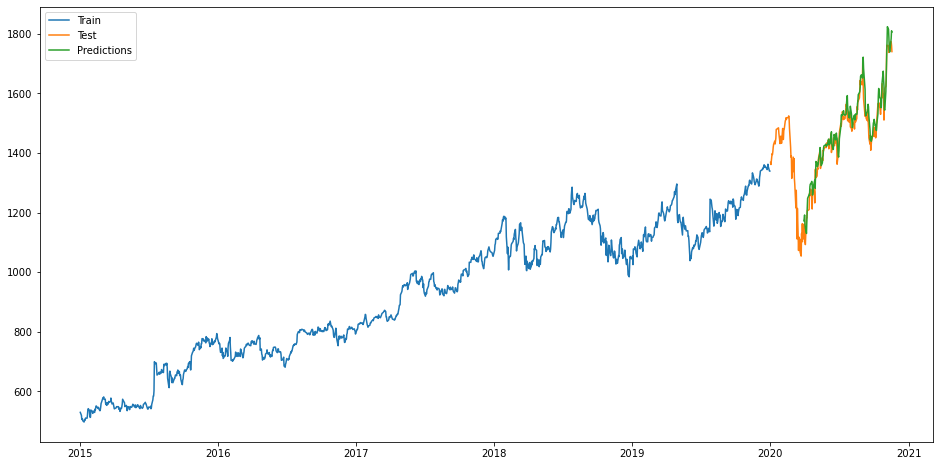

In [13]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(preds_unscaled, label='Predictions')
plt.legend()

In [14]:
# Get MSEs
train_mse = history.history['mse']
valid_mse = history.history['val_mse']
test_mse = mean_squared_error(test[test.shape[0] - preds_unscaled.shape[0]:], preds_unscaled)
test_mse

1385.5154537895228

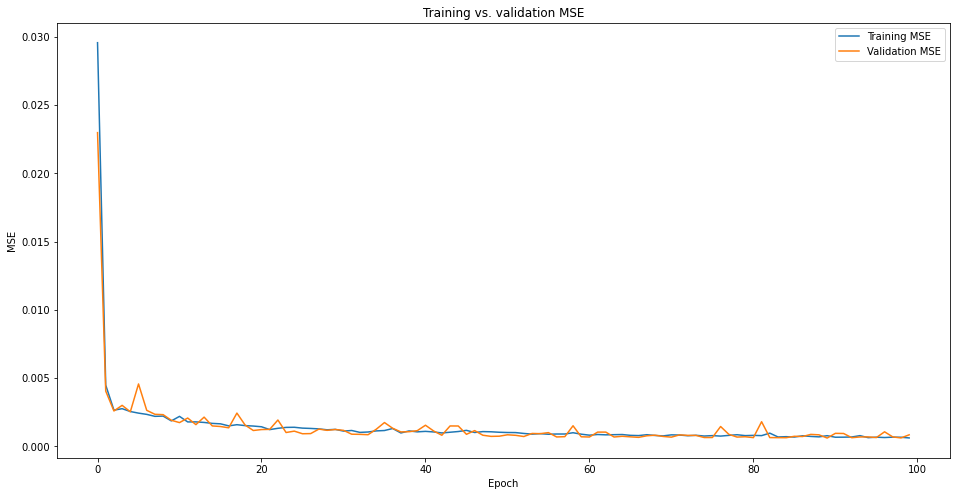

In [15]:
plt.plot(train_mse, label='Training MSE'), 
plt.plot(valid_mse, label='Validation MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.title('Training vs. validation MSE')
plt.legend()